# data exploration

In this notebook, I'll try to identify some patterns and correlations in the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../input/data.csv')

In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [5]:
df.corr()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
game_event_id,1.000000,-0.002553,-0.060091,-0.028404,0.060091,-0.028404,-0.270736,0.956042,-0.004507,-0.021293,0.062077,-0.037232,NaN,0.028478
game_id,-0.002553,1.000000,0.013021,-0.019553,-0.013021,-0.019553,0.014481,0.009879,0.917235,-0.007107,-0.030327,-0.001612,NaN,0.761656
lat,-0.060091,0.013021,1.000000,0.016217,-1.000000,0.016217,0.071462,-0.041248,-0.001143,0.052714,-0.818517,0.148070,NaN,-0.030790
loc_x,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,NaN,-0.019917
loc_y,0.060091,-0.013021,-1.000000,-0.016217,1.000000,-0.016217,-0.071462,0.041248,0.001143,-0.052714,0.818517,-0.148070,NaN,0.030790
lon,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,NaN,-0.019917
minutes_remaining,-0.270736,0.014481,0.071462,0.006898,-0.071462,0.006898,1.000000,-0.043425,0.015101,0.025558,-0.059767,0.028342,NaN,-0.005731
period,0.956042,0.009879,-0.041248,-0.028165,0.041248,-0.028165,-0.043425,1.000000,0.008789,0.005832,0.046993,-0.032152,NaN,0.000364
playoffs,-0.004507,0.917235,-0.001143,-0.012790,0.001143,-0.012790,0.015101,0.008789,1.000000,-0.002490,-0.008667,-0.001257,NaN,0.612571
seconds_remaining,-0.021293,-0.007107,0.052714,0.001083,-0.052714,0.001083,0.025558,0.005832,-0.002490,1.000000,-0.051482,0.030804,NaN,-0.004868


we have some important correlations:  
game_event_id - period
game_id - playoffs  
lat - loc_y  
lon - loc_x  


There is no missing value except fot the shot_made_flag. Those are the values we are going to redict.  
we're going to drop those null values.  
Variables can be put into 4 categories:  
**space**  
- lat
- loc_x
- loc_y
- lon
- shot_distance
- shot_zone_area
- shot_zone_basic
- shot_zone_range  

**time**  
- minutes_remaining
- period
- season
- seconds_remaining
- game_date  

**game**  
- game_event_id
- game_id
- playoffs
- team_id
- team_name
- matchup
- opponent

**shot**  
- action_type
- combined_shot_type
- shot_type
- shot_id

I left out *shot_made_flag* as it is the label we're trying to predict

In [6]:
df = df.dropna(subset=['shot_made_flag'])

In [7]:
# sort the dataframe to get shots in chronological order
df['period_time'] = (11 - df['minutes_remaining']) + ((60 - df['seconds_remaining'])/60)
df.sort_values(['game_date','period','period_time'], ascending=True, inplace=True)

In [8]:
def feature_chart(dataframe, count, group):
    df = dataframe.groupby([count, group])[group].count().unstack(count)
    df.fillna(0, inplace=True)
    df['percent_success'] = (df[1] / (df[0] + df[1])) * 100
    print(df)
    #df[[0,1]].plot(kind='bar', stacked=True) 
    df['percent_success'].plot(kind='bar')

some features have too many values to make helpful graphs

## space

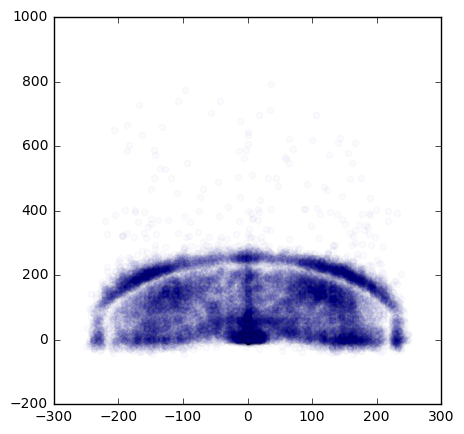

In [9]:
# shots location
plt.figure(figsize=(5,5))
plt.scatter(df.loc_x,df.loc_y, alpha=0.02)

shot_made_flag     0.0     1.0  percent_success
shot_distance                                  
0               1683.0  2925.0        63.476562
1                177.0   345.0        66.091954
2                226.0   257.0        53.209110
3                180.0   139.0        43.573668
4                167.0   150.0        47.318612
5                251.0   193.0        43.468468
6                319.0   238.0        42.728905
7                349.0   254.0        42.122720
8                297.0   271.0        47.711268
9                300.0   228.0        43.181818
10               343.0   245.0        41.666667
11               324.0   278.0        46.179402
12               354.0   290.0        45.031056
13               460.0   326.0        41.475827
14               515.0   379.0        42.393736
15               557.0   415.0        42.695473
16               710.0   455.0        39.055794
17               748.0   477.0        38.938776
18               716.0   479.0        40

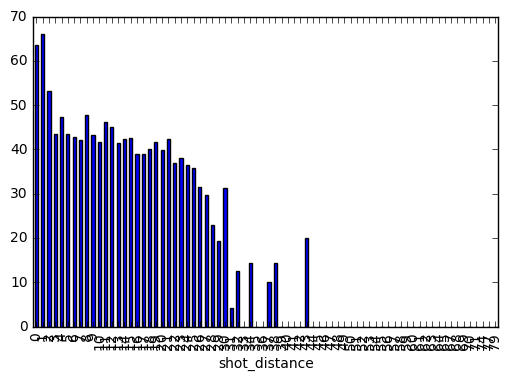

In [10]:
feature_chart(df, 'shot_made_flag', 'shot_distance')

shot_made_flag          0.0   1.0  percent_success
shot_zone_area                                    
Back Court(BC)           71     1         1.388889
Center(C)              5356  5933        52.555585
Left Side Center(LC)   2149  1215        36.117717
Left Side(L)           1889  1243        39.687101
Right Side Center(RC)  2458  1523        38.256719
Right Side(R)          2309  1550        40.165846


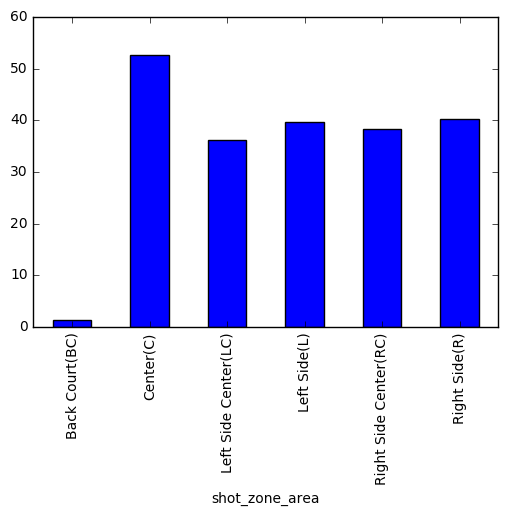

In [11]:
feature_chart(df, 'shot_made_flag', 'shot_zone_area')

shot_made_flag          0.0   1.0  percent_success
shot_zone_basic                                   
Above the Break 3      3166  1554        32.923729
Backcourt                59     1         1.666667
In The Paint (Non-RA)  2117  1763        45.438144
Left Corner 3           151    89        37.083333
Mid-Range              6253  4279        40.628561
Restricted Area        2266  3666        61.800405
Right Corner 3          220   113        33.933934


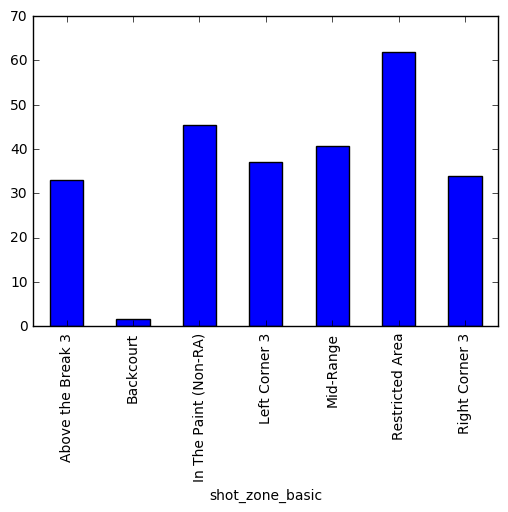

In [12]:
feature_chart(df, 'shot_made_flag', 'shot_zone_basic')

shot_made_flag    0.0   1.0  percent_success
shot_zone_range                             
16-24 ft.        4132  2775        40.176632
24+ ft.          3525  1756        33.251278
8-16 ft.         3150  2430        43.548387
Back Court Shot    71     1         1.388889
Less Than 8 ft.  3354  4503        57.311951


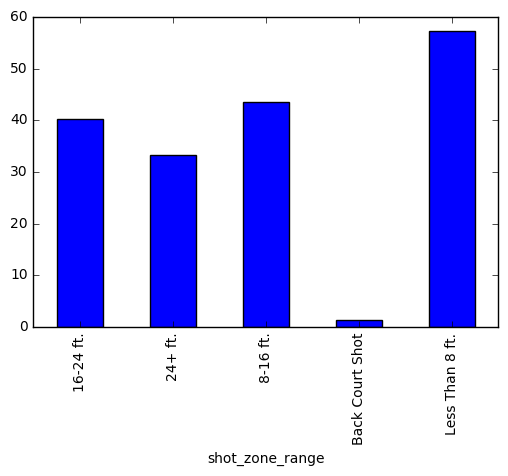

In [13]:
feature_chart(df, 'shot_made_flag', 'shot_zone_range')

## time

shot_made_flag      0.0   1.0  percent_success
minutes_remaining                             
0                  2012  1236        38.054187
1                  1257  1017        44.722955
2                  1315  1064        44.724674
3                  1304  1073        45.140934
4                  1319  1089        45.224252
5                  1169  1020        46.596619
6                  1050   931        46.996466
7                   972   904        48.187633
8                   989   760        43.453402
9                   976   900        47.974414
10                  980   818        45.494994
11                  889   653        42.347601


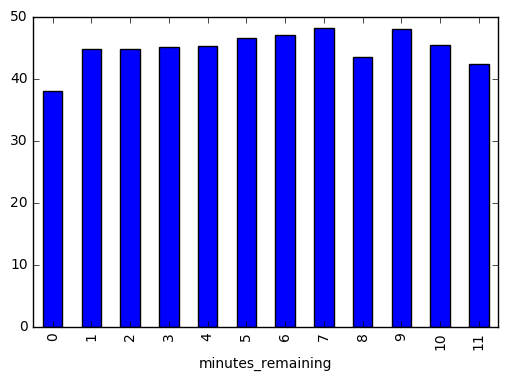

In [14]:
feature_chart(df, 'shot_made_flag', 'minutes_remaining')

shot_made_flag   0.0   1.0  percent_success
period                                     
1               3580  3120        46.567164
2               3106  2529        44.880213
3               3827  3175        45.344187
4               3543  2500        41.370180
5                156   124        44.285714
6                 16    14        46.666667
7                  4     3        42.857143


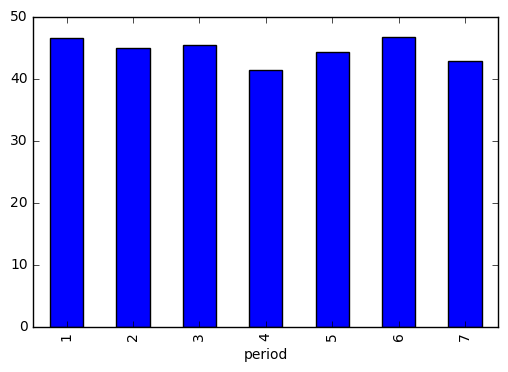

In [15]:
feature_chart(df, 'shot_made_flag', 'period')

shot_made_flag   0.0  1.0  percent_success
season                                    
1996-97          221  162        42.297650
1997-98          461  349        43.086420
1998-99          414  351        45.882353
1999-00          708  604        46.036585
2000-01          840  735        46.666667
2001-02          925  783        45.843091
2002-03         1044  808        43.628510
2003-04          777  594        43.326039
2004-05          635  492        43.655723
2005-06         1051  873        45.374220
2006-07          856  723        45.788474
2007-08          967  852        46.838922
2008-09          985  866        46.785521
2009-10          968  804        45.372460
2010-11          842  679        44.641683
2011-12          813  603        42.584746
2012-13          720  608        45.783133
2013-14           35   24        40.677966
2014-15          370  223        37.605396
2015-16          600  332        35.622318


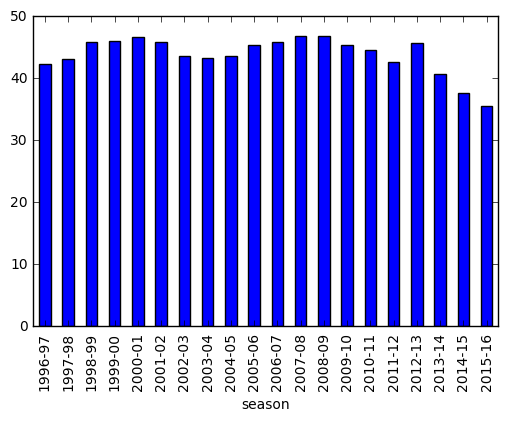

In [16]:
feature_chart(df, 'shot_made_flag', 'season')

In [17]:
# get time information like year, month and week day
import datetime

df['year'] = pd.DatetimeIndex(df['game_date']).year
df['month'] = pd.DatetimeIndex(df['game_date']).month
df['weekday'] = pd.DatetimeIndex(df['game_date']).weekday
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,team_id,team_name,game_date,matchup,opponent,shot_id,period_time,year,month,weekday
22901,Jump Shot,Jump Shot,102,29600027,33.9283,-140,116,-118.4098,0,1,...,1610612747,Los Angeles Lakers,1996-11-03,LAL vs. MIN,MIN,22902,11.300000,1996,11,6
22902,Jump Shot,Jump Shot,127,29600031,33.9473,-131,97,-118.4008,10,2,...,1610612747,Los Angeles Lakers,1996-11-05,LAL @ NYK,NYK,22903,1.866667,1996,11,1
22903,Jump Shot,Jump Shot,124,29600044,33.8633,-142,181,-118.4118,8,2,...,1610612747,Los Angeles Lakers,1996-11-06,LAL @ CHH,CHA,22904,3.383333,1996,11,2
22904,Jump Shot,Jump Shot,144,29600044,34.0443,0,0,-118.2698,6,2,...,1610612747,Los Angeles Lakers,1996-11-06,LAL @ CHH,CHA,22905,5.433333,1996,11,2
22905,Jump Shot,Jump Shot,151,29600044,33.9063,-10,138,-118.2798,5,2,...,1610612747,Los Angeles Lakers,1996-11-06,LAL @ CHH,CHA,22906,6.550000,1996,11,2


shot_made_flag   0.0  1.0  percent_success
year                                      
1996              43   26        37.681159
1997             356  269        43.040000
1998             283  216        43.286573
1999             530  453        46.083418
2000             907  809        47.144522
2001             751  646        46.241947
2002            1038  822        44.193548
2003             913  695        43.221393
2004             860  646        42.895086
2005             699  568        44.830308
2006             938  825        46.795235
2007             895  733        45.024570
2008             941  858        47.693163
2009            1049  924        46.832235
2010             949  744        43.945659
2011             591  480        44.817927
2012            1051  815        43.676313
2013             468  381        44.876325
2014             325  199        37.977099
2015             321  172        34.888438
2016             324  184        36.220472


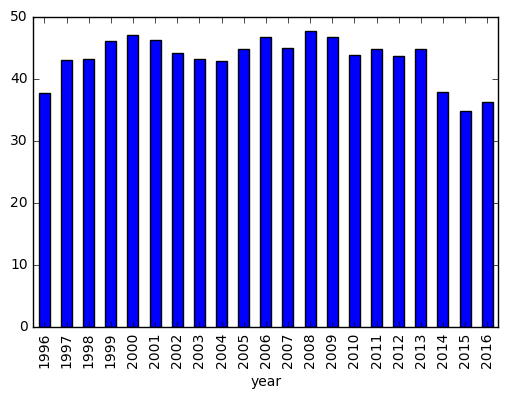

In [18]:
feature_chart(df, 'shot_made_flag', 'year')

shot_made_flag   0.0   1.0  percent_success
month                                      
1               2128  1762        45.295630
2               1874  1569        45.570723
3               2428  1896        43.848289
4               1773  1396        44.051751
5               1163   984        45.831393
6                426   308        41.961853
10               188   142        43.030303
11              1974  1581        44.472574
12              2278  1827        44.506699


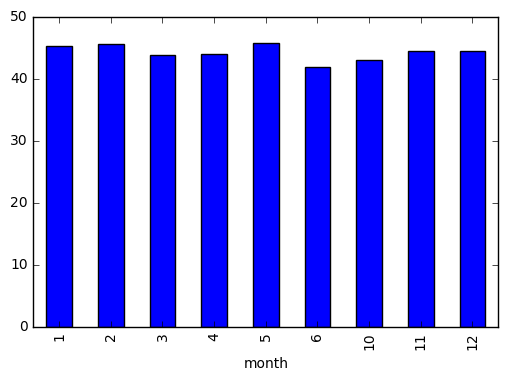

In [19]:
feature_chart(df, 'shot_made_flag', 'month')

shot_made_flag   0.0   1.0  percent_success
weekday                                    
0               1078   812        42.962963
1               2466  2038        45.248668
2               2322  1916        45.210005
3               1350  1079        44.421573
4               2917  2339        44.501522
5                904   710        43.990087
6               3195  2571        44.588970


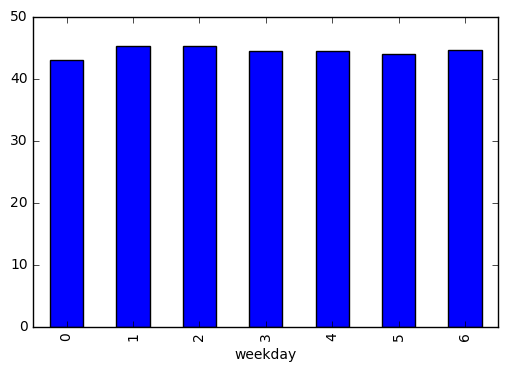

In [20]:
feature_chart(df, 'shot_made_flag', 'weekday')

In [21]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'period_time', 'year', 'month', 'weekday'],
      dtype='object')

/home/guillaume/anaconda3/lib/python3.5/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)
/home/guillaume/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/guillaume/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

shot_made_flag     0.0     1.0  percent_success
rest_time                                      
0.0                1.0     0.0         0.000000
1.0             2811.0  2249.0        44.446640
2.0             7837.0  6348.0        44.751498
3.0             1912.0  1518.0        44.256560
4.0              776.0   635.0        45.003544
5.0              256.0   194.0        43.111111
6.0              234.0   197.0        45.707657
7.0              122.0    91.0        42.723005
8.0               20.0    27.0        57.446809
9.0               37.0    35.0        48.611111
10.0              13.0     6.0        31.578947
11.0               4.0     0.0         0.000000
12.0               6.0     5.0        45.454545
14.0               6.0     9.0        60.000000
18.0               3.0    13.0        81.250000
31.0              12.0     6.0        33.333333
131.0              9.0     6.0        40.000000
133.0              4.0     5.0        55.555556
134.0              5.0     4.0        44

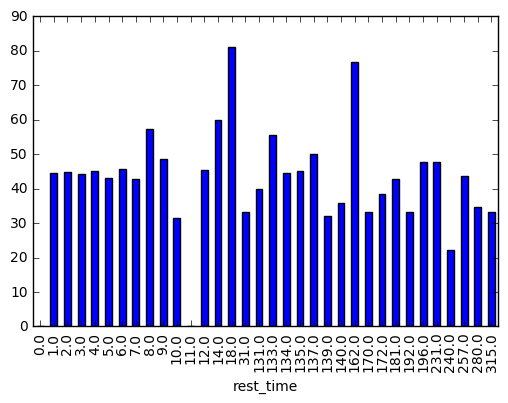

In [22]:
df_games = df[['game_id','game_date']]
df_games.drop_duplicates(inplace=True)
df_games['game_date'] = pd.to_datetime(df_games['game_date'])
df_games['rest_time'] = df_games['game_date'] - (pd.to_datetime(df['game_date'].shift(1).fillna(df['game_date'])))
# we need to change time difference to float so we can do some operations on it
df_games['rest_time'] = df_games['rest_time'] / np.timedelta64(1, 'D')

# then I compute the moving average with periods 5,10 and 20
periods = [5,10,20]
for n in periods:
    col = 'rest_MA' + str(n)
    df_games[col] = df_games['rest_time'].rolling(n).mean()

# we import the rest time data in our dataframe (df)
df = pd.merge(df, df_games, on='game_id', how='outer')
feature_chart(df, 'shot_made_flag', 'rest_time')

shot_made_flag   0.0   1.0  percent_success
rest_MA10                                  
1.5               15    14        48.275862
1.6              101    88        46.560847
1.7              523   444        45.915202
1.8              806   709        46.798680
1.9             1378  1141        45.295752
2.0             1147   833        42.070707
2.1             2100  1649        43.985063
2.2             1015   831        45.016251
2.3             1203   999        45.367847
2.4              807   672        45.436105
2.5              734   617        45.669874
2.6              592   459        43.672693
2.7              319   247        43.639576
2.8              305   214        41.233141
2.9              278   224        44.621514
3.0              253   185        42.237443
3.1              130   109        45.606695
3.2               85    66        43.708609
3.3              111    89        44.500000
3.4               66    55        45.454545
3.5              118    93      

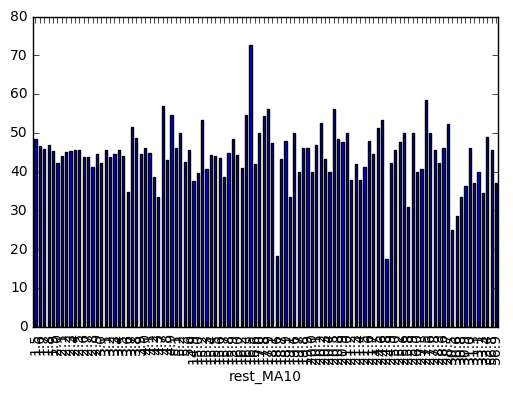

In [23]:
feature_chart(df, 'shot_made_flag', 'rest_MA10')

There doesn't seem to be any correlation between rest_time and success rate.  

## game

shot_made_flag    0.0   1.0  percent_success
playoffs                                    
0               12145  9794        44.641962
1                2087  1671        44.465141


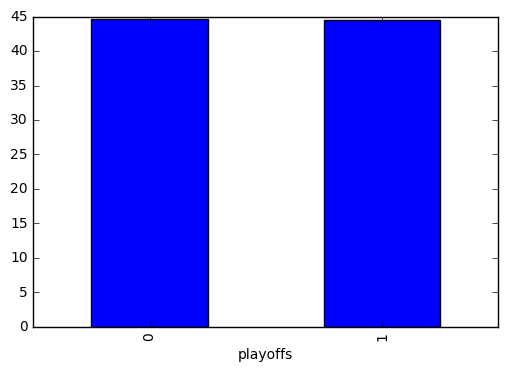

In [24]:
feature_chart(df, 'shot_made_flag', 'playoffs')

In [25]:
# make home/away feature from matchup
# if contains @, this is away game. home game otherwise
def home(row):
    try:
        row['matchup'].index('@')
        return 'away'
    except:
        return 'home'
        
df['venue'] = df.apply(home, axis = 1)

shot_made_flag   0.0   1.0  percent_success
venue                                      
away            7446  5766        43.642144
home            6786  5699        45.646776


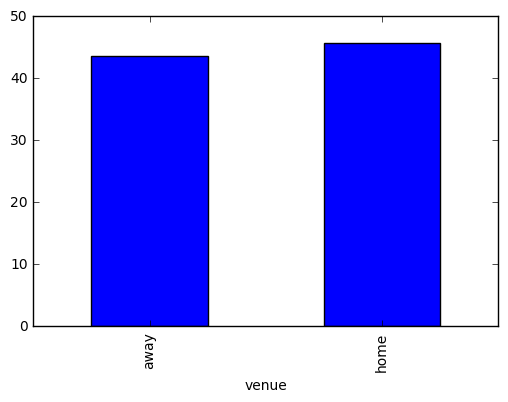

In [26]:
feature_chart(df, 'shot_made_flag', 'venue')

shot_made_flag  0.0  1.0  percent_success
opponent                                 
ATL             240  198        45.205479
BKN              27   18        40.000000
BOS             461  322        41.123883
CHA             282  218        43.600000
CHI             294  222        43.023256
CLE             288  226        43.968872
DAL             564  469        45.401742
DEN             733  619        45.784024
DET             328  259        44.122658
GSW             612  531        46.456693
HOU             791  608        43.459614
IND             375  251        40.095847
LAC             579  495        46.089385
MEM             479  392        45.005741
MIA             295  222        42.940039
MIL             299  208        41.025641
MIN             677  542        44.462674
NJN             238  184        43.601896
NOH             261  214        45.052632
NOP             170  117        40.766551
NYK             296  270        47.703180
OKC             326  235        41

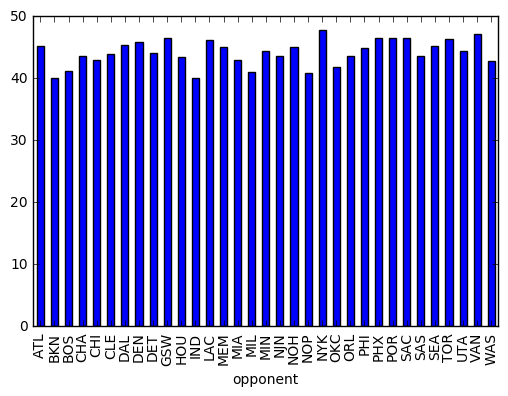

In [27]:
feature_chart(df, 'shot_made_flag', 'opponent')

So far there seems to be no change in success rate when we look at the different features. It's always in the 40s percents.  
The type of shot and the location seem to be the most influencials, also, they might be highly correlated.
Time can play. we can see a slight drop in the last minute of games. This is probably due to last chance shots. This might also be why there's a slight drop of success rate in period 4.  
for further analysis:  
- compare with success streak
- compare with total of shots in game

## shot

shot_made_flag                       0.0     1.0  percent_success
action_type                                                      
Alley Oop Dunk Shot                  5.0    90.0        94.736842
Alley Oop Layup shot                19.0    48.0        71.641791
Cutting Layup Shot                   2.0     4.0        66.666667
Driving Bank shot                    1.0     2.0        66.666667
Driving Dunk Shot                    6.0   251.0        97.665370
Driving Finger Roll Layup Shot       7.0    52.0        88.135593
Driving Finger Roll Shot            10.0    58.0        85.294118
Driving Floating Bank Jump Shot      0.0     1.0       100.000000
Driving Floating Jump Shot           2.0     1.0        33.333333
Driving Hook Shot                    5.0     8.0        61.538462
Driving Jump shot                   13.0    10.0        43.478261
Driving Layup Shot                 421.0  1207.0        74.140049
Driving Reverse Layup Shot          21.0    62.0        74.698795
Driving Sl

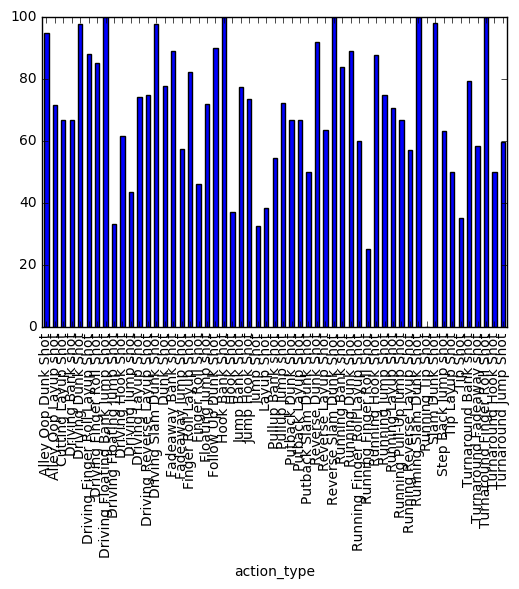

In [28]:
feature_chart(df, 'shot_made_flag', 'action_type')

shot_made_flag        0.0   1.0  percent_success
combined_shot_type                              
Bank Shot              25    95        79.166667
Dunk                   76   980        92.803030
Hook Shot              59    68        53.543307
Jump Shot           12002  7708        39.107052
Layup                1971  2561        56.509267
Tip Shot               99    53        34.868421


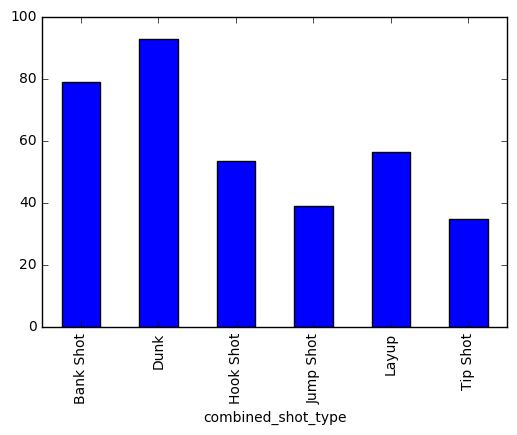

In [29]:
feature_chart(df, 'shot_made_flag', 'combined_shot_type')

shot_made_flag    0.0   1.0  percent_success
shot_type                                   
2PT Field Goal  10602  9683        47.734779
3PT Field Goal   3630  1782        32.926829


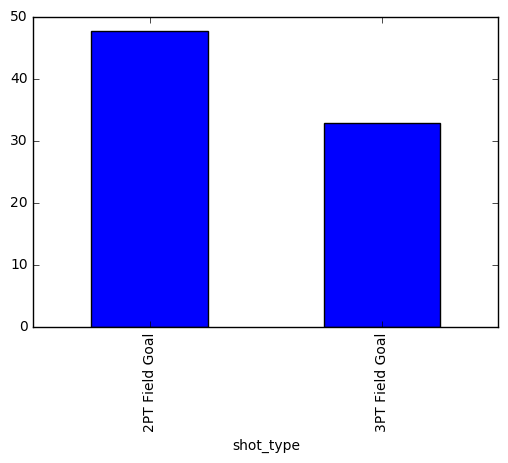

In [30]:
feature_chart(df, 'shot_made_flag', 'shot_type')

### Moving Average
  
Here, I am trying to find a correlation between the MA of shot_made_flag and the success rate.  
The idea is the n last shots result will reflect the current situation (Kobe's level of confidence, oponent's strangth, ...). When a lot of shot's are successful in a given period of time, the next shot is more likely to be successful.  
The moving average will be a value between 0 and 1. 0 means that Kobe failed all his last n shots. 1 means that all of them were successful.  
I start with a period of 10. I will have to try with different periods.

In [31]:
df['MA10'] = pd.rolling_mean(df['shot_made_flag'],10)    

/home/guillaume/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  if __name__ == '__main__':


shot_made_flag     0.0     1.0  percent_success
MA10                                           
0.0               72.0     0.0         0.000000
0.1              501.0    63.0        11.170213
0.2             1496.0   380.0        20.255864
0.3             3047.0  1245.0        29.007456
0.4             3867.0  2586.0        40.074384
0.5             3074.0  3033.0        49.664320
0.6             1532.0  2418.0        61.215190
0.7              515.0  1232.0        70.520893
0.8              110.0   407.0        78.723404
0.9               13.0    87.0        87.000000
1.0                0.0    10.0       100.000000


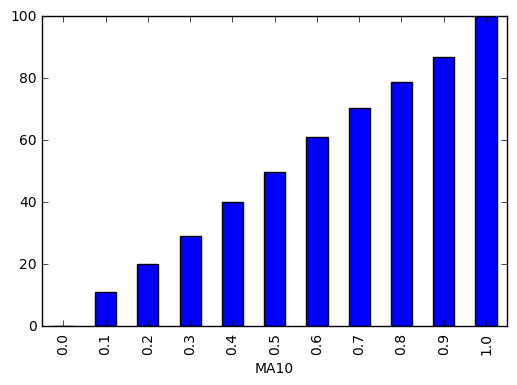

In [32]:
feature_chart(df, 'shot_made_flag', 'MA10')

/home/guillaume/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
  if __name__ == '__main__':


shot_made_flag     0.0     1.0  percent_success
MA20                                           
0.05               1.0     0.0         0.000000
0.10              27.0     2.0         6.896552
0.15             112.0    21.0        15.789474
0.20             316.0    83.0        20.802005
0.25             782.0   250.0        24.224806
0.30            1352.0   583.0        30.129199
0.35            2029.0  1027.0        33.606021
0.40            2594.0  1659.0        39.007759
0.45            2567.0  2210.0        46.263345
0.50            1923.0  2012.0        51.130877
0.55            1312.0  1586.0        54.727398
0.60             761.0  1087.0        58.820346
0.65             335.0   627.0        65.176715
0.70              92.0   238.0        72.121212
0.75              18.0    57.0        76.000000
0.80               0.0    15.0       100.000000


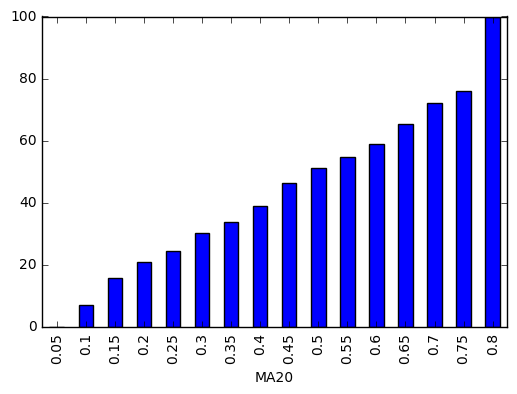

In [33]:
df['MA20'] = pd.rolling_mean(df['shot_made_flag'],20)
feature_chart(df, 'shot_made_flag', 'MA20')